# TTT4185 Machine learning for Speech technology

## Computer assigment 3b:  Regression analysis

Regression analysis is used to estimate/measure the relationship between an _independent_ variable, say $x$, and a _dependent_ variable, say $y$. One of the simplest regression problems is 
\begin{equation}
y = ax + b
\end{equation}
where $a$ and $b$ are constants. In practice our observations will be contaminated by noise, so we have
\begin{equation}
y = ax + b + n,
\end{equation}
where $n$ is noise, eg. measurement errors. This particular problem is called _linear regression_.

We will have a look at _non-linear regression_, using deep neural networks. Here we are looking at general regression problems in the form 
\begin{equation}
y = f(x) + n.
\end{equation}

We generate our data according to the function $f(x) = x^2 + \cos(20x) \text{ sign}(x)$, obtaining a set of observations $\{(x_i,y_i)\}$.

Then we assume we do not know the underlying function and we try to recover and approximation of $f$ only using the observations $\{(x_i,y_i)\}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

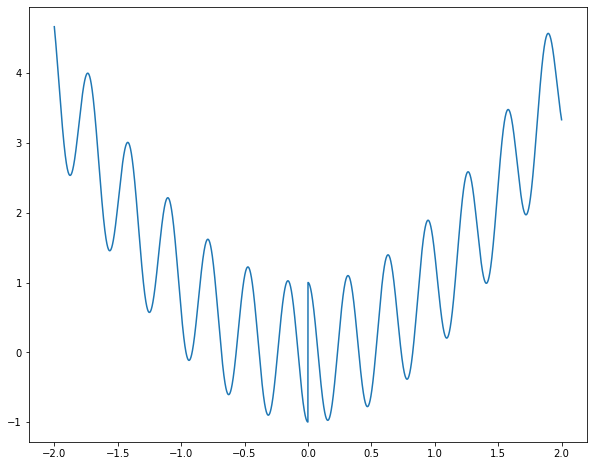

In [2]:
# Define function
def f(x):
    return x**2 + np.cos(20*x)*np.sign(x)

# Setup some simulation parameters
# Number of observations
N = 5000

# Plot a "clean" version of the relationship between x and y
plt.figure(figsize=(10, 8))
x = np.linspace(-2,2,N)
plt.plot(x,f(x))
plt.show()

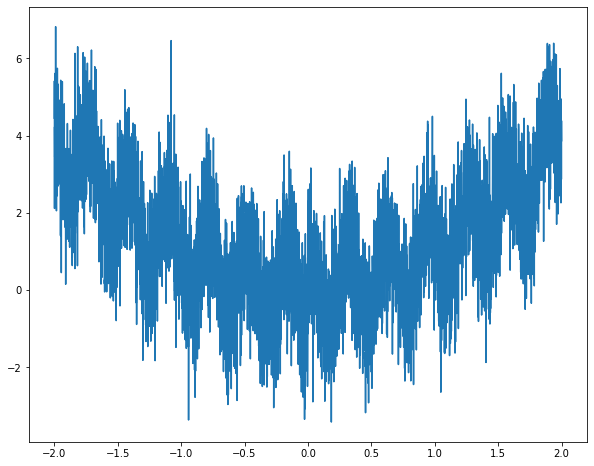

In [3]:
# Create a noise version of the observations
y = f(x) + np.random.randn(len(x))
plt.figure(figsize=(10, 8))
plt.plot(x,y)
plt.show()

One way to perform regression is to assume that the data is generated using a set of functions from a cerain family, for example polynomials of order $p$,
\begin{equation}
\hat f(x) = a_0 + a_1 x + a_2 x^2 \ldots a_p x^p.
\end{equation}
Then regression corresponds to fitting the parameters in the model. Let us see how this works out before using our neural networks.

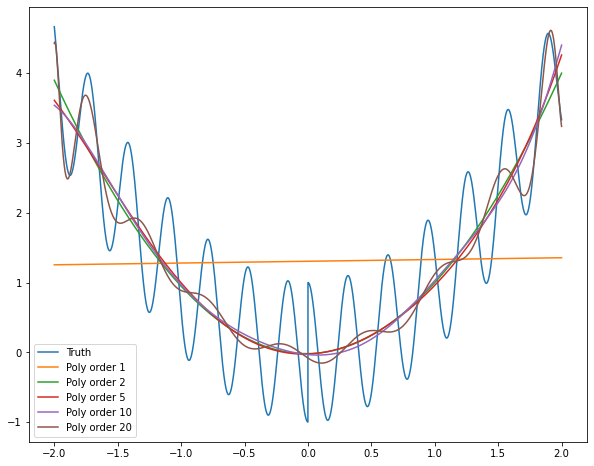

In [4]:
# Give a set of polynomial orders to try
P = [1, 2, 5, 10, 20]

# Define estimator function. Arguments are inout variable, observation and polynomial order
# Returns a set of polynomial coefficients
def reg_estimator(x,y,p):
    # Use simple ls approach
    N = len(x)
    H = np.zeros((N,p+1))
    for col in range(p+1):
        H[:,col] = x**col
    iHtH = np.linalg.inv(np.dot(H.T,H))
    theta = np.dot(np.dot(iHtH,H.T),y)
    return theta

# Computes fx) = c_0 + c_1x + c_2 x^2 ... c_p x^p
def poly(x, C):
    # compute p(x) for coeffs in c
    y = 0*x
    for p, c in enumerate(C):
        y += c*x**p        
    return y

plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
for p in P:
    C = reg_estimator(x,y,p)
    plt.plot(x,poly(x,C),label="Poly order " + str(p))
plt.legend()
plt.show()

## Problem 1
Play with different $p$ to see how close you can get to the true function.

Note: Very high $p$ will give numerical problems.

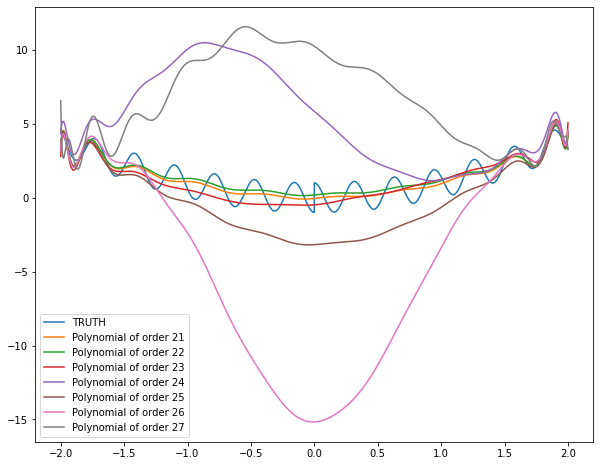

In [5]:
#Use higher orders compared to previous list
P = [21,22,23,24,25,26,27]

plt.figure(figsize = (10,8))
plt.plot(x,f(x),label = 'TRUTH')

for p in P:
    C = reg_estimator(x,y,p)
    plt.plot(x,poly(x,C), label = 'Polynomial of order' +' '+str(p))
plt.legend()
plt.show()

In what follows we will use a deep neural network to approximate $f$. We set this up below

In [6]:
# Ceate a model with a single hidden layer. Note that input and output has
# dimension one
M = 512
model = keras.Sequential([
    keras.layers.Dense(M, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(1)
])

model.summary()
# Train the model
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


We train the network by using $x$ as an input and the squared error between the network output $\hat y$ and the observed value $y$ as a loss
\begin{equation}
 L = \frac{1}{N} \sum_n (\hat y - y)^2
\end{equation}

We first try our network on clean data to check if it works.

In [7]:
# train the model
history = model.fit(x, f(x), epochs=1000, batch_size=128, verbose=True)

Epoch 1/1000
40/40 [==============================] - 1s 2ms/step - loss: 1.8092 - accuracy: 0.0000e+00
Epoch 2/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.8418 - accuracy: 0.0000e+00
Epoch 3/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.0000e+00
Epoch 4/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.6268 - accuracy: 0.0000e+00
Epoch 5/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.0000e+00
Epoch 6/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5502 - accuracy: 0.0000e+00
Epoch 7/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5338 - accuracy: 0.0000e+00
Epoch 8/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5215 - accuracy: 0.0000e+00
Epoch 9/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5173 - accuracy: 0.0000e+00
Epoch 10/1000
40/40 [==============================] - 0s 2ms/st

Using the variable `history`, plot the evolution of the loss during training. 

157/157 [==============================] - 0s 1ms/step


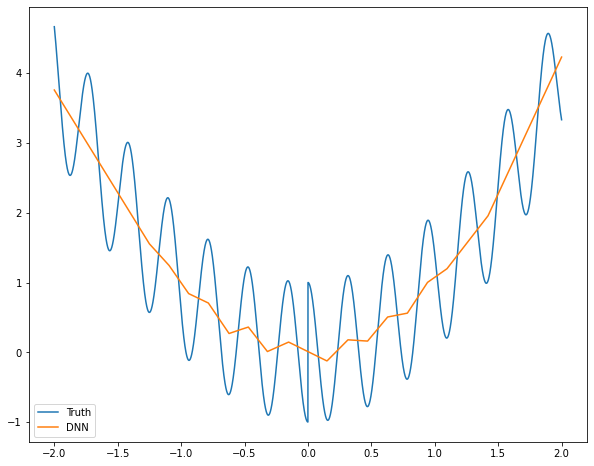

In [8]:
# Compute \hat y from the network and compare this to the true f(x)
z = model.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z,label="DNN")
plt.legend()
plt.show()

## Problem 2
Try increasing the number of nodes in the network to see if the results can be improved.

In [9]:
# Incresae the number of nodes to 1024
M_i = 1024
model_i = keras.Sequential([
    keras.layers.Dense(M_i, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(1)
])

model_i.summary()
# Train the model
model_i.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1024)              2048      
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Train the model
history = model_i.fit(x, f(x), epochs=1000, batch_size= 32, verbose=True)

Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 0.9224 - accuracy: 0.0000e+00
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.5401 - accuracy: 0.0000e+00
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.0000e+00
Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.5070 - accuracy: 0.0000e+00
Epoch 5/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.0000e+00
Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.0000e+00
Epoch 7/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 0.0000e+00
Epoch 8/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.0000e+00
Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.0000e+00
Epoch 10/1000
157/157 [=======================

157/157 [==============================] - 0s 1ms/step


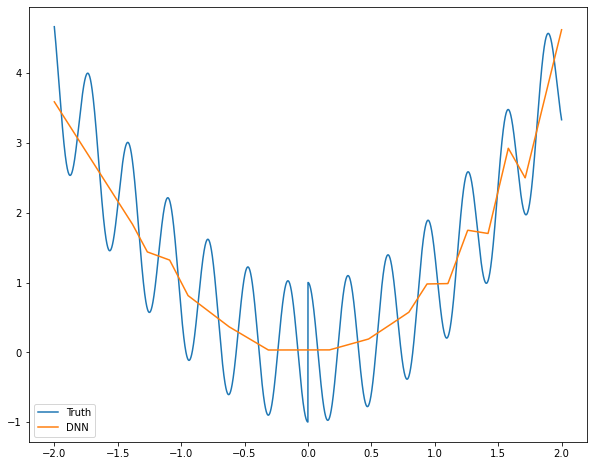

In [11]:
# Compute \hat y from the network and compare this to the true f(x)
z_i = model_i.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z_i,label="DNN")
plt.legend()
plt.show()

Next we will use a deep network with more than one hidden layer.

In [12]:
# Create a model with multiple hidden layers. Note that input and output has
# dimension one
M_j = 16
model_j = keras.Sequential([
    keras.layers.Dense(M_j, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(M_j, activation=tf.nn.relu),
    keras.layers.Dense(M_j, activation=tf.nn.relu),
    keras.layers.Dense(M_j, activation=tf.nn.relu),
    keras.layers.Dense(1)
])
model_j.summary()

# Train the model
model_j.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

history = model_j.fit(x, f(x), epochs=1000, batch_size=128, verbose=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                32        
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
40/40 [==============================] - 1s

157/157 [==============================] - 0s 1ms/step


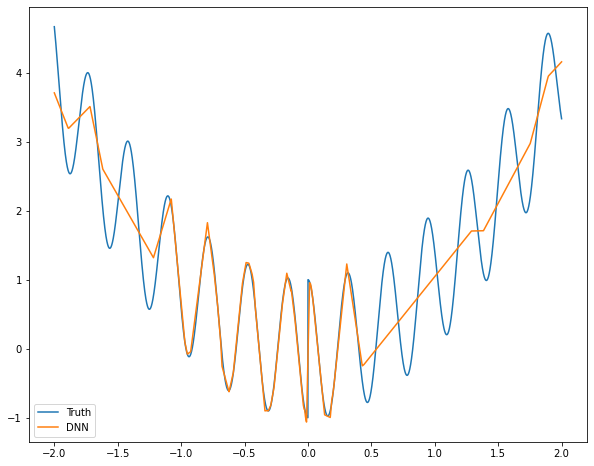

In [13]:
z_j = model_j.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z_j,label="DNN")
plt.legend()
plt.show()

## Problem 3
Try increasing the number of hidden nodes per layer until performance is satisfactory. Can the same effect be achieved by just adding more layers?

In [14]:
#Hidden Layers = 32
M_k = 32
model_k = keras.Sequential([
    keras.layers.Dense(M_k, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(M_k, activation=tf.nn.relu),
    keras.layers.Dense(M_k, activation=tf.nn.relu),
    keras.layers.Dense(M_k, activation=tf.nn.relu),
    keras.layers.Dense(1)
])
model_k.summary()

# Train the model
model_k.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

history = model_k.fit(x, f(x), epochs=1000, batch_size=2, verbose=False)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                64        
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________


157/157 [==============================] - 0s 1ms/step


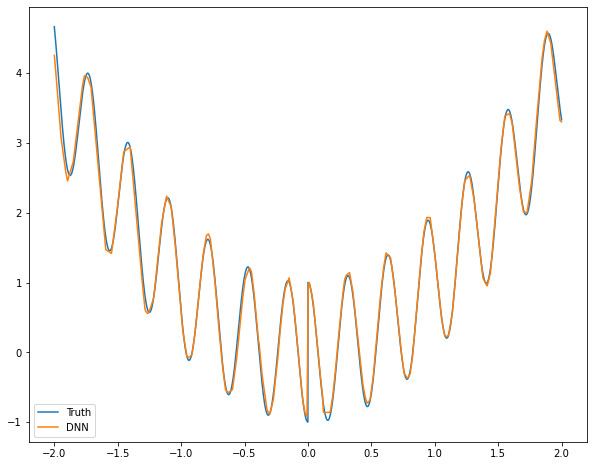

In [15]:
z_k = model_k.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z_k,label="DNN")
plt.legend()
plt.show()

In [16]:
#Hidden Layers = 64
M_l = 64
model_l = keras.Sequential([
    keras.layers.Dense(M_l, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(M_l, activation=tf.nn.relu),
    keras.layers.Dense(M_l, activation=tf.nn.relu),
    keras.layers.Dense(M_l, activation=tf.nn.relu),
    keras.layers.Dense(1)
])
model_l.summary()

# Train the model
model_l.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

history = model_l.fit(x, f(x), epochs=1000, batch_size=2, verbose=False)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                128       
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


157/157 [==============================] - 0s 744us/step


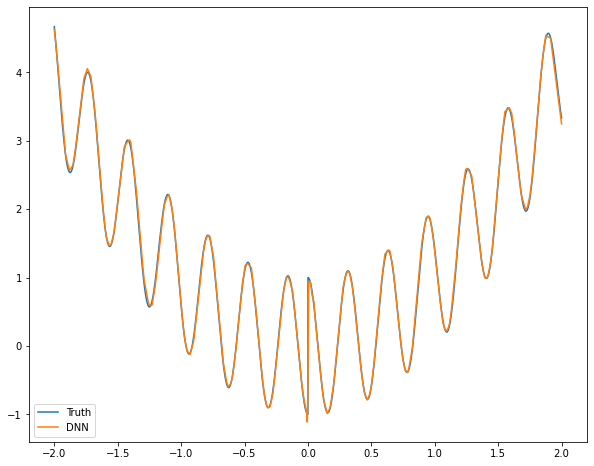

In [17]:
z_l = model_l.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z_l,label="DNN")
plt.legend()
plt.show()

In [18]:
#Hidden Layers = 128
M_m = 128
model_m = keras.Sequential([
    keras.layers.Dense(M_m, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(M_m, activation=tf.nn.relu),
    keras.layers.Dense(M_m, activation=tf.nn.relu),
    keras.layers.Dense(M_m, activation=tf.nn.relu),
    keras.layers.Dense(1)
])
model_m.summary()

# Train the model
model_m.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

history = model_m.fit(x, f(x), epochs=1000, batch_size=2, verbose=False)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 128)               256       
                                                                 
 dense_20 (Dense)            (None, 128)               16512     
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 1)                 129       
                                                                 
Total params: 49,921
Trainable params: 49,921
Non-trainable params: 0
_________________________________________________________________


157/157 [==============================] - 0s 833us/step


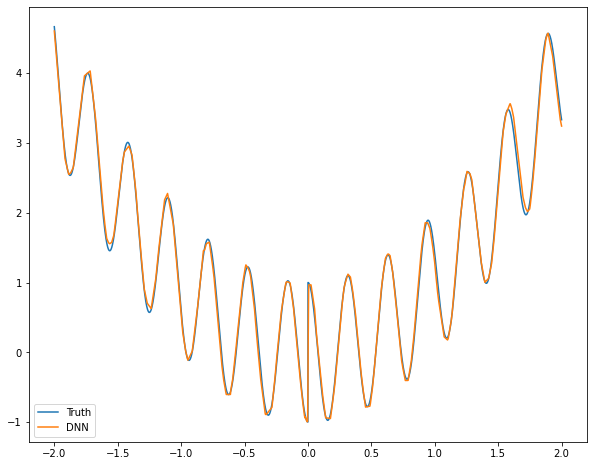

In [19]:
z_m = model_m.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z_m,label="DNN")
plt.legend()
plt.show()

In [20]:
# Add more layers!
M_n = 16
model_n = keras.Sequential([
    keras.layers.Dense(M_n, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(M_n, activation=tf.nn.relu),
    keras.layers.Dense(M_n, activation=tf.nn.relu),
    keras.layers.Dense(M_n, activation=tf.nn.relu),
    keras.layers.Dense(M_n, activation=tf.nn.relu),
    keras.layers.Dense(M_n, activation=tf.nn.relu),
    keras.layers.Dense(M_n, activation=tf.nn.relu),
    keras.layers.Dense(M_n, activation=tf.nn.relu),
    keras.layers.Dense(M_n, activation=tf.nn.relu),
    keras.layers.Dense(M_n, activation=tf.nn.relu),
    keras.layers.Dense(M_n, activation=tf.nn.relu),
    keras.layers.Dense(M_n, activation=tf.nn.relu),
    keras.layers.Dense(M_n, activation=tf.nn.relu),
    keras.layers.Dense(M_n, activation=tf.nn.relu),
    keras.layers.Dense(M_n, activation=tf.nn.relu),
    keras.layers.Dense(M_n, activation=tf.nn.relu),
    keras.layers.Dense(1)
])
model_n.summary()

# Train the model
model_n.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

history = model_n.fit(x, f(x), epochs=1000, batch_size=2, verbose=False)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                32        
                                                                 
 dense_25 (Dense)            (None, 16)                272       
                                                                 
 dense_26 (Dense)            (None, 16)                272       
                                                                 
 dense_27 (Dense)            (None, 16)                272       
                                                                 
 dense_28 (Dense)            (None, 16)                272       
                                                                 
 dense_29 (Dense)            (None, 16)                272       
                                                                 
 dense_30 (Dense)            (None, 16)               

157/157 [==============================] - 0s 869us/step


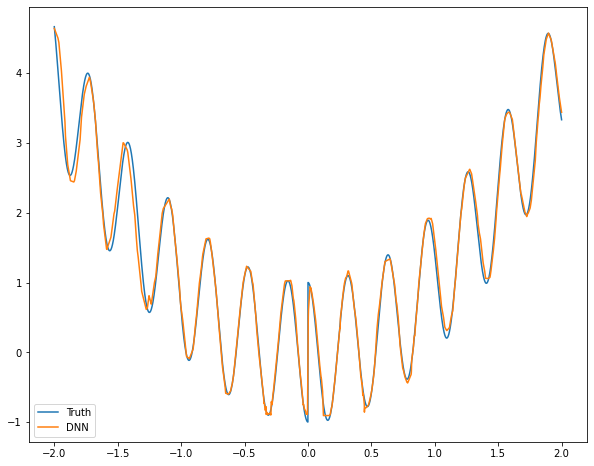

In [21]:
z_n = model_n.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z_n,label="DNN")
plt.legend()
plt.show()

Similar effect was observed by adding more layers

## Problem 4
Using the best setup from the previous problem, train a model using the noisy data.

In [22]:
#Use the best Model without validation data
#Hidden Layers = 64

history = model_l.fit(x, y, epochs=1000, batch_size=2, verbose=True)

Epoch 1/1000
2500/2500 [==============================] - 2s 932us/step - loss: 1.1223 - accuracy: 0.0000e+00
Epoch 2/1000
2500/2500 [==============================] - 2s 912us/step - loss: 1.0688 - accuracy: 0.0000e+00
Epoch 3/1000
2500/2500 [==============================] - 2s 925us/step - loss: 1.0670 - accuracy: 0.0000e+00
Epoch 4/1000
2500/2500 [==============================] - 2s 969us/step - loss: 1.0697 - accuracy: 0.0000e+00
Epoch 5/1000
2500/2500 [==============================] - 2s 939us/step - loss: 1.0720 - accuracy: 0.0000e+00
Epoch 6/1000
2500/2500 [==============================] - 2s 929us/step - loss: 1.0659 - accuracy: 0.0000e+00
Epoch 7/1000
2500/2500 [==============================] - 2s 961us/step - loss: 1.0694 - accuracy: 0.0000e+00
Epoch 8/1000
2500/2500 [==============================] - 2s 926us/step - loss: 1.0655 - accuracy: 0.0000e+00
Epoch 9/1000
2500/2500 [==============================] - 2s 984us/step - loss: 1.0676 - accuracy: 0.0000e+00
Epoch 10/1

157/157 [==============================] - 0s 925us/step


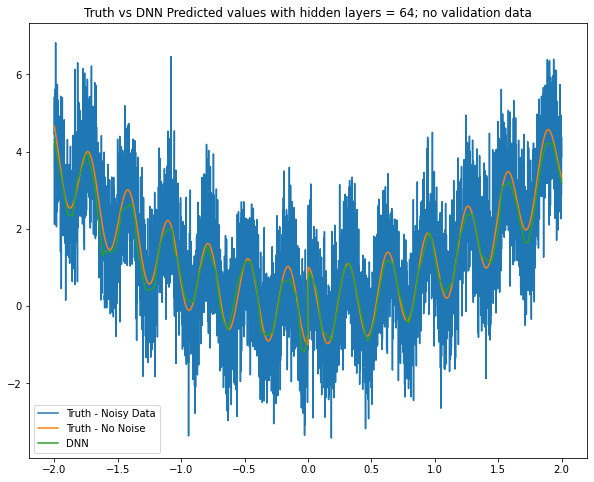

In [23]:
z64 = model_l.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,y,label="Truth - Noisy Data")
plt.plot(x,f(x),label="Truth - No Noise")
plt.plot(x,z64,label="DNN")
plt.title("Truth vs DNN Predicted values with hidden layers = 64; no validation data")
plt.legend()
plt.show()